In [28]:
import pandas as pd
df = pd.read_json('yelp_academic_dataset_business.json')

ValueError: Trailing data

In [32]:
import json
data = []
with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [34]:
df_sb = df[df["city"] == 'Santa Barbara']

In [36]:
df_sb

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [43]:
import numpy as np 

#34.4235° N, 119.7035° W

df_sb['distance'] = np.sqrt((df_sb['latitude'] - 34.4235) **2 + (df_sb['longitude']+119.7035) ** 2)


/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_6488/3651767811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb['distance'] = np.sqrt((df_sb['latitude'] - 34.4235) **2 + (df_sb['longitude']+119.7035) ** 2)


In [44]:
df_sb

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,distance
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,0.008327
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",0.004480
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",0.015702
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",0.026751
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",0.007911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None,0.032985
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ...",0.014842
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",0.010731
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",0.040056


Text(0.5, 1.0, 'Stars vs DIstance to downtown')

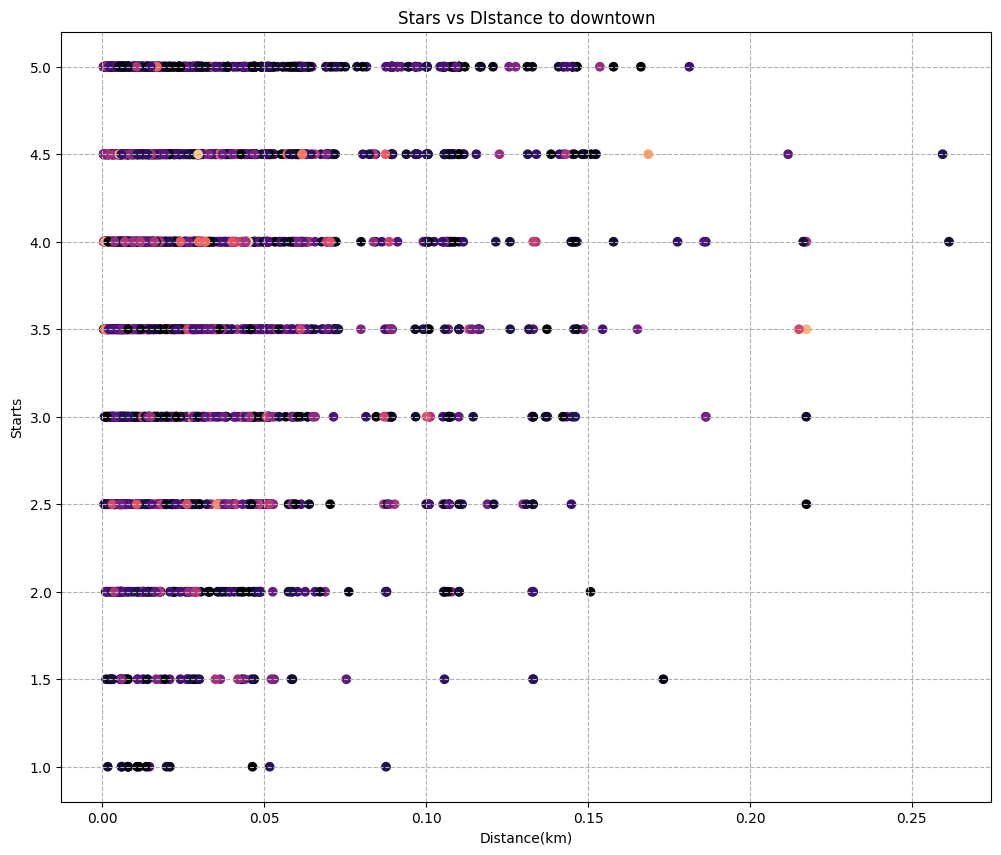

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.grid(True, linestyle='--')

plt.ylabel('Starts')
plt.xlabel('Distance(km)')
plt.scatter( df_sb['distance'] , df_sb['stars'],  c= np.log((df_sb['review_count'] / np.max(df_sb['review_count']))), cmap='magma', facecolor='#E1E1E1')
plt.title('Stars vs DIstance to downtown')


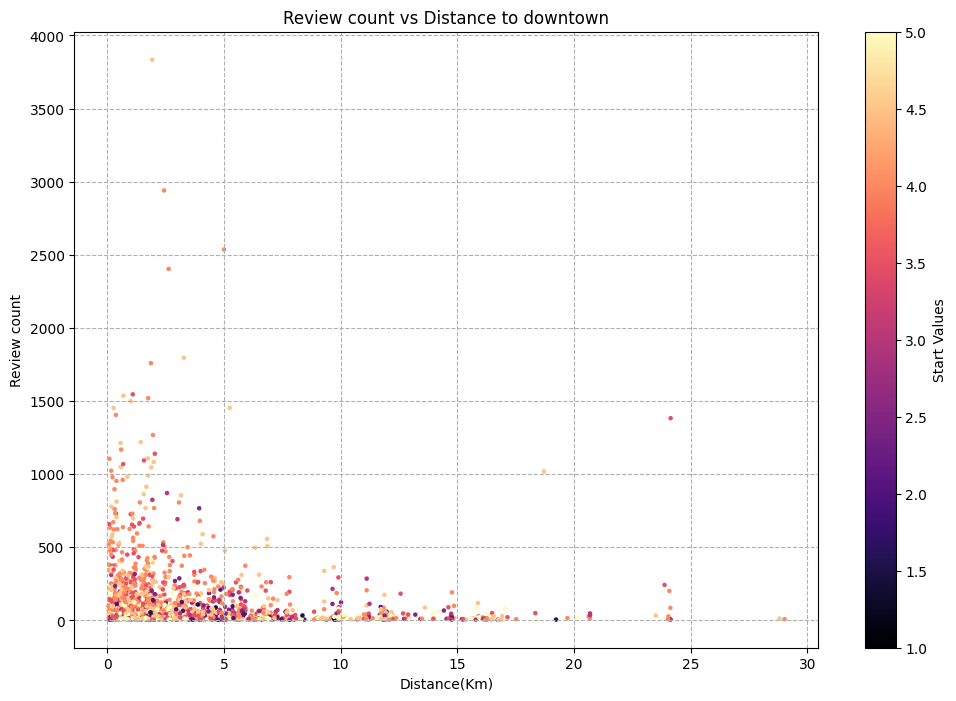

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.ylabel('Review count')
plt.xlabel('Distance(Km)')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

plt.scatter( df_sb['distance'] * 111, df_sb['review_count'] , c=df_sb['stars'], cmap='magma', s=5, facecolor='E1E1E1')



# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Start Values')

plt.show()

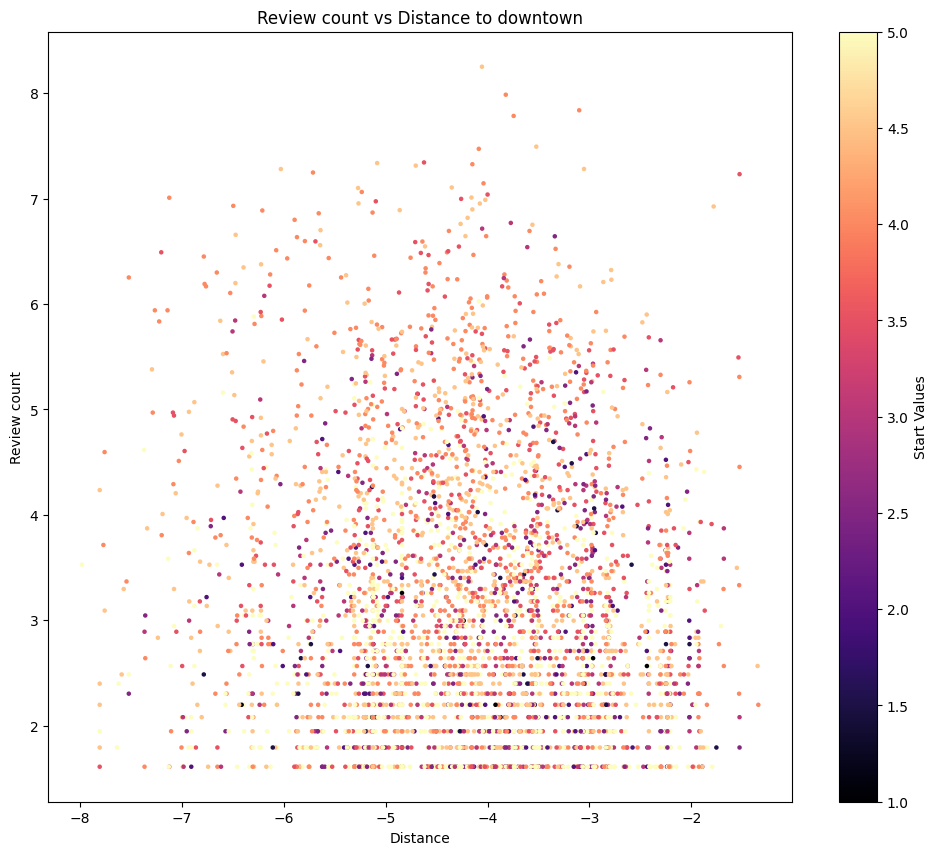

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.ylabel('Review count')
plt.xlabel('Distance')
plt.title('Review count vs Distance to downtown')

plt.scatter( np.log(df_sb['distance']) , np.log(df_sb['review_count']) , c=df_sb['stars'], cmap='magma', s=5)


# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Start Values')

plt.show()

In [15]:
df['distance'].sort_values()

144012    195.591805
3022      197.136904
113348    197.138061
6294      197.140440
149186    197.143979
             ...    
69912     242.612887
129646    242.630290
146399    242.630649
91477     242.654146
23509     242.658578
Name: distance, Length: 150346, dtype: float64

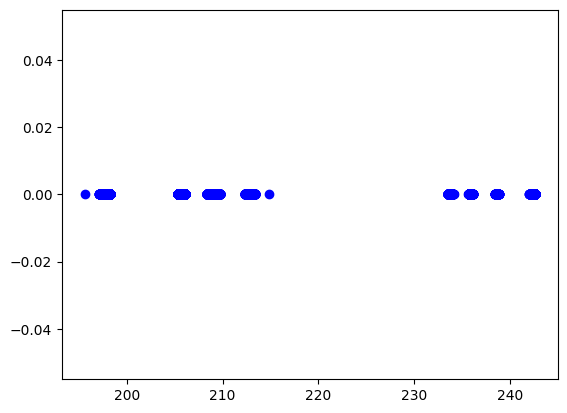

In [16]:
plt.scatter(df['distance'], [0] * len(df['distance']), marker='o', color='b')

In [33]:
df[df['state'] == 'CA']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
150272,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,Isla Vista,CA,93117,34.412966,-119.856886,2.5,12,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",None
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [ ]:
import json
import pandas as pd

data = []

with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        business = json.loads(line)
        if business['state'] == 'WA':  # Check if 'State' is 'WA'
            data.append(business)

df = pd.DataFrame(data)